# Assignment 3 - Landon Burleson 
## Problem 1
The goal of __Problem 1__ is to showcase the performance of different architectures with differing
filter sizes for each layer within the CNN frontend. 

In [19]:
#Adding in the necessary modules needed to complete Assignment 3
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from tensorflow import keras

In [20]:
#Pulling in the MNIST test data.
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [21]:
#Creating the sequential model for a the number of filters decreasing as the layers increase
cnn_model1 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool3"),
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])
cnn_model1._name = "cnn_model1"

#Creating the sequential model for a the number of filters decreasing as the layers increase
cnn_model2 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])
cnn_model2._name = "cnn_model2"

#Creating the sequential model for a the number of filters matching an hourglass shape. 
cnn_model3 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv7"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv8"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])
cnn_model3._name = "cnn_model3"

cnn_model1.summary()
cnn_model2.summary()
cnn_model3.summary()

Model: "cnn_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                                                 
 conv3 (Conv2D)              (None, 14, 14, 64)        36928     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 64)          0         
                                                                 
 conv4 (Conv2D)              (None, 7, 7, 128)         73856     
                                                                 
 conv5 (Conv2D)              (None, 7, 7, 128)         1

In [22]:
# Training the architectures defined above. 
e = 10
opt = keras.optimizers.SGD(lr=0.0001)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history1 = cnn_model1.fit(x_train, y_train, epochs=e)
test1 = cnn_model1.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history2 = cnn_model2.fit(x_train, y_train, epochs=e)
test2 = cnn_model2.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history3 = cnn_model3.fit(x_train, y_train, epochs=e)
test3 = cnn_model3.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4781 - accuracy: 0.8570
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1814 - accuracy: 0.9456
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1361 - accuracy: 0.9587
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1125 - accuracy: 0.9652
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0961 - accuracy: 0.9704
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0851 - accuracy: 0.9739
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0774 - accuracy: 0.9767
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0706 - accuracy: 0.9789
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0653 - accuracy: 0.9804
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0811 

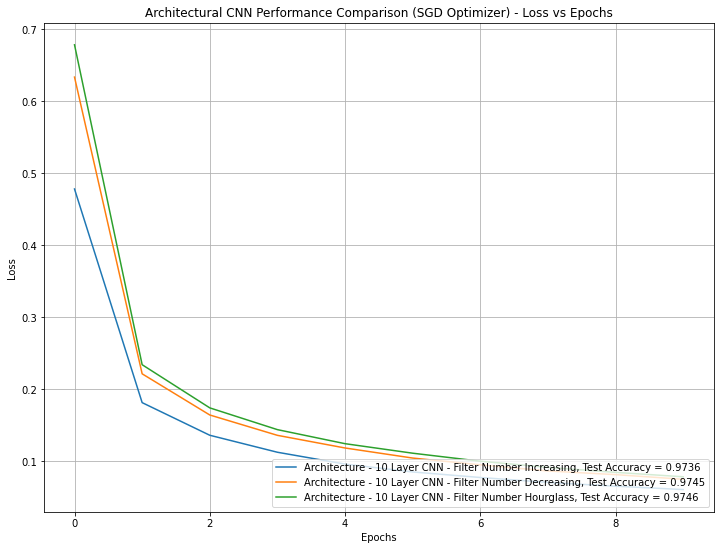

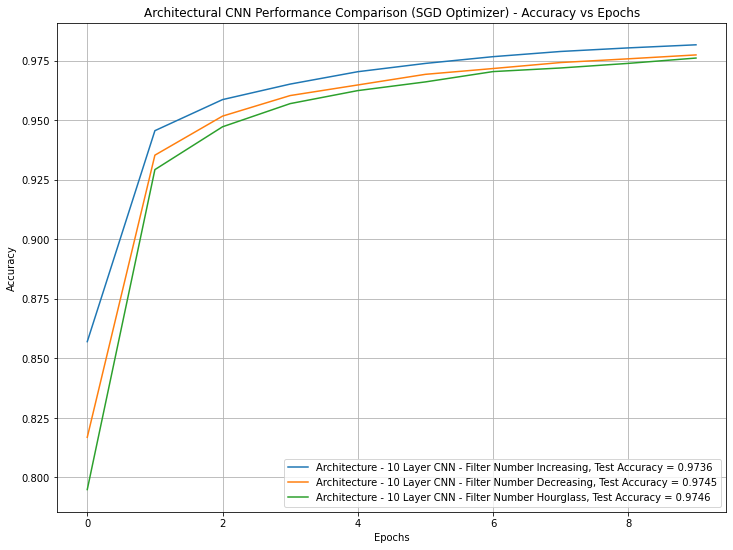

In [23]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (SGD Optimizer) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (SGD Optimizer) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

In [24]:
# Training the architectures defined above. 
e = 10
opt = keras.optimizers.Adam(lr=0.0001)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history1 = cnn_model1.fit(x_train, y_train, epochs=e)
test1 = cnn_model1.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history2 = cnn_model2.fit(x_train, y_train, epochs=e)
test2 = cnn_model2.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history3 = cnn_model3.fit(x_train, y_train, epochs=e)
test3 = cnn_model3.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1085 - accuracy: 0.9676
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0513 - accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0263 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0161 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0097 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0104 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0

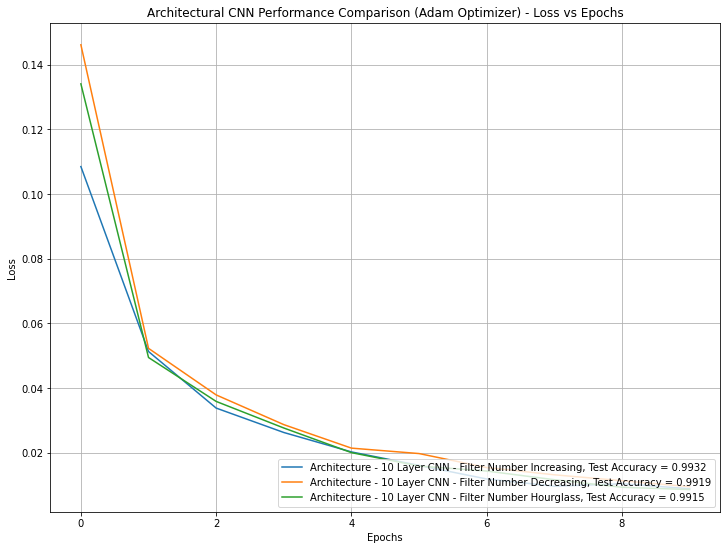

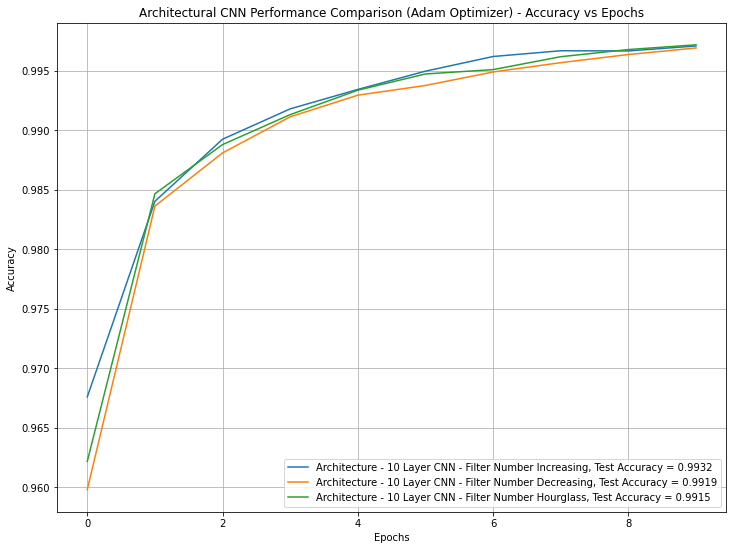

In [25]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (Adam Optimizer) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (Adam Optimizer) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

In [26]:
# Training the architectures defined above. 
e = 10
opt = keras.optimizers.RMSprop(lr=0.0001)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history1 = cnn_model1.fit(x_train, y_train, epochs=e)
test1 = cnn_model1.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history2 = cnn_model2.fit(x_train, y_train, epochs=e)
test2 = cnn_model2.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history3 = cnn_model3.fit(x_train, y_train, epochs=e)
test3 = cnn_model3.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.9991
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 9.7322e-04 - accuracy: 0.9998
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 7.6270e-04 - accuracy: 0.9998
Epoch 10/10
313/313 [==============================] - 1s 3ms/ste

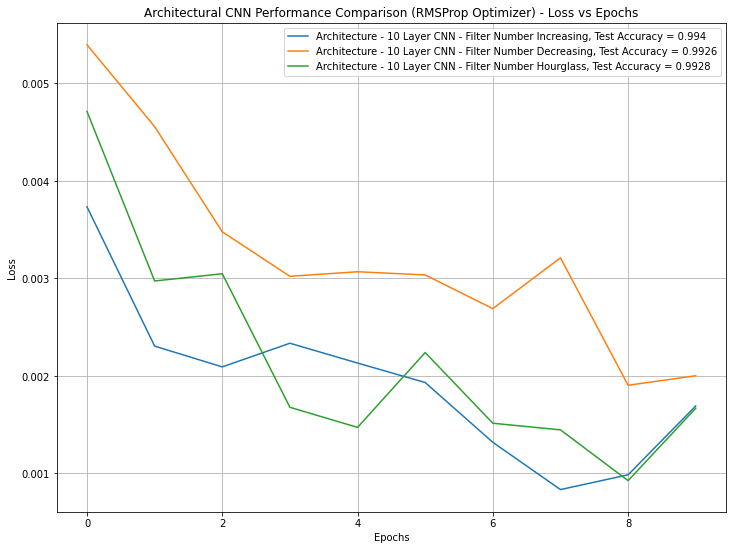

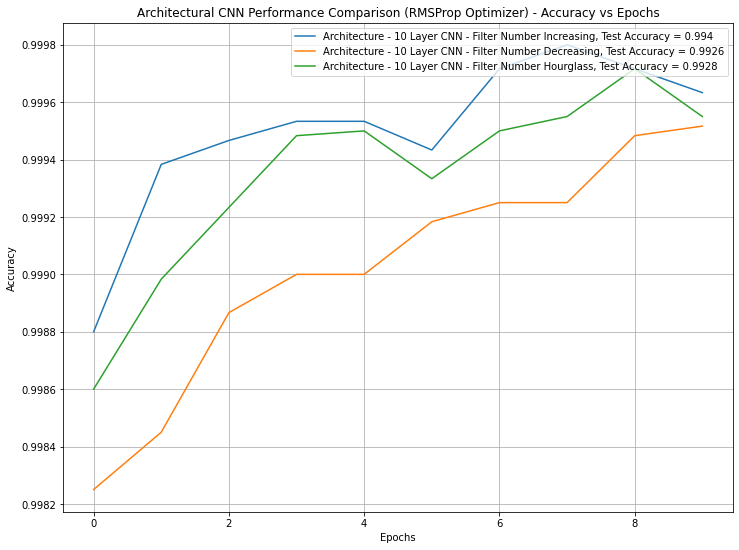

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (RMSProp Optimizer) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='upper right')
plt.grid()
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (RMSProp Optimizer) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
#Compiling the model with a loss, optimizer, and other metrics
learning = np.linspace(0.0001, 0.005, 4)
history1 = []
test1 = []
history2 = []
test2 = []
history3 = []
test3 = []

cnn_model1.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test1.append(cnn_model1.evaluate(x_test, y_test))

cnn_model2.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

history2.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test2.append(cnn_model1.evaluate(x_test, y_test))

cnn_model3.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

history3.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test3.append(cnn_model1.evaluate(x_test, y_test))

for lrn in learning:
    opt = keras.optimizers.Adam(learning_rate=lrn)
    cnn_model1.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    cnn_model2.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    cnn_model3.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    #Shows the whole network topology for the compiled CNN
    cnn_model1.summary()
    cnn_model2.summary()
    cnn_model3.summary()

    #Training the network.
    history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32)) 
    history2.append(cnn_model2.fit(x_train, y_train, epochs=e, batch_size=32)) 
    history3.append(cnn_model3.fit(x_train, y_train, epochs=e, batch_size=32)) 

    test1.append(cnn_model1.evaluate(x_test, y_test))
    test2.append(cnn_model2.evaluate(x_test, y_test))
    test3.append(cnn_model3.evaluate(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0702 - accuracy: 0.9806
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0540 - accuracy: 0.9846
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0447 - accuracy: 0.9875
Epoch 4/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0431 - accuracy: 0.9879
Epoch 5/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0371 - accuracy: 0.9899
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0375 - accuracy: 0.9897
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0331 - accuracy: 0.9916
Epoch 8/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0346 - accuracy: 0.9903
Epoch 9/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0248 - accuracy: 0.9931
Epoch 10/25
1875/1875 [==============================] - 10s 5ms/step - lo

KeyboardInterrupt: 

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate,  Filter Number Increase) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history1):
	if(idx == 0):
		plt.plot(history1[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate, Filter Number Increase) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history1):
	if (idx == 0):
		plt.plot(history1[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()


# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate,  Filter Number Decrease) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history2):
	if(idx == 0):
		plt.plot(history2[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate, Filter Number Decrease) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history2):
	if (idx == 0):
		plt.plot(history2[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')
		
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate,  Filter Hourglass) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history3):
	if(idx == 0):
		plt.plot(history3[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate, Filter Hourglass) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

for idx, i in enumerate(history3):
	if (idx == 0):
		plt.plot(history3[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Compiling the model with a loss, optimizer, and other metrics
batches = [8, 16, 32, 64, 128]
history1 = []
test1 = []
history2 = []
test2 = []
history3 = []
test3 = []

cnn_model1.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test1.append(cnn_model1.evaluate(x_test, y_test))

cnn_model2.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

history2.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test2.append(cnn_model1.evaluate(x_test, y_test))

cnn_model3.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

history3.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test3.append(cnn_model1.evaluate(x_test, y_test))

for bat in batches:
    #Shows the whole network topology for the compiled CNN
    cnn_model1.summary()
    cnn_model2.summary()
    cnn_model3.summary()

    #Training the network.
    history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=bat)) 
    history2.append(cnn_model2.fit(x_train, y_train, epochs=e, batch_size=bat)) 
    history3.append(cnn_model3.fit(x_train, y_train, epochs=e, batch_size=bat)) 

    test1.append(cnn_model1.evaluate(x_test, y_test))
    test2.append(cnn_model2.evaluate(x_test, y_test))
    test3.append(cnn_model3.evaluate(x_test, y_test))

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size,  Filter Number Increase) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history1):
	if(idx == 0):
		plt.plot(history1[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['loss'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size, Filter Number Increase) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history1):
	if (idx == 0):
		plt.plot(history1[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()


# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size,  Filter Number Decrease) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history2):
	if(idx == 0):
		plt.plot(history2[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['loss'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size, Filter Number Decrease) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history2):
	if (idx == 0):
		plt.plot(history2[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')
		
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size,  Filter Hourglass) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history3):
	if(idx == 0):
		plt.plot(history3[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['loss'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size, Filter Hourglass) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

for idx, i in enumerate(history3):
	if (idx == 0):
		plt.plot(history3[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

## Problem 2

The following code demonstrates the LaNet7 architecture in tensorflow using the MNIST dataset. 

In [ ]:
#Pulling in the cifar10 test data.
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

The following code represents the sequential LeNet model and the code needed to train based upon
changing the learning rate.

In [ ]:
# Building the LeNet model in keras
e = 25
lanet = keras.models.Sequential([
    keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', input_shape = (32, 32, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(16, (5, 5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

#Compiling the model with a loss, optimizer, and other metrics
learning = np.linspace(0.0001, 0.005, 4)
history4 = []
test4 = []

lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=32))
test4.append(lanet.evaluate(x_test, y_test))

for lrn in learning:
    opt = keras.optimizers.Adam(learning_rate=lrn)
    lanet.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    #Shows the whole network topology for the compiled CNN
    lanet.summary()

    #Training the network.
    history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=32)) 
    test4.append(lanet.evaluate(x_test, y_test))


Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7796 - accuracy: 0.4127
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3263 - accuracy: 0.5274
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2027 - accuracy: 0.5749
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1162 - accuracy: 0.6083
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0374 - accuracy: 0.6381
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9526 - accuracy: 0.6675
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8804 - accuracy: 0.6921
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8056 - accuracy: 0.7195
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7500 - accuracy: 0.7378
Epoch 10/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.676

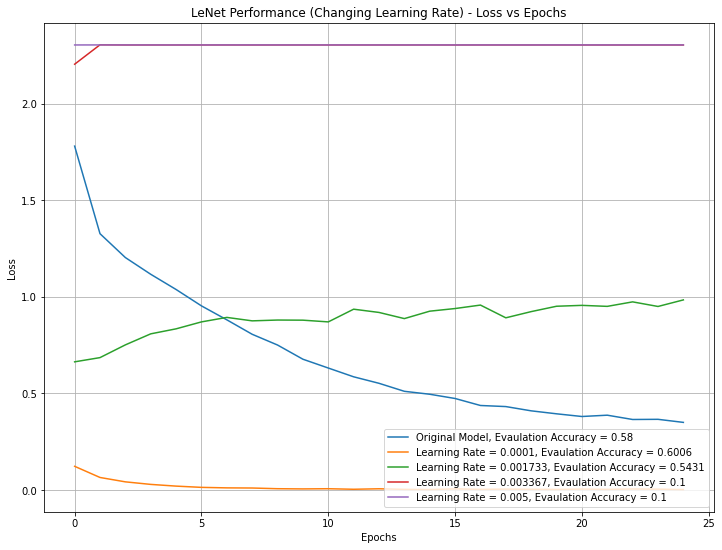

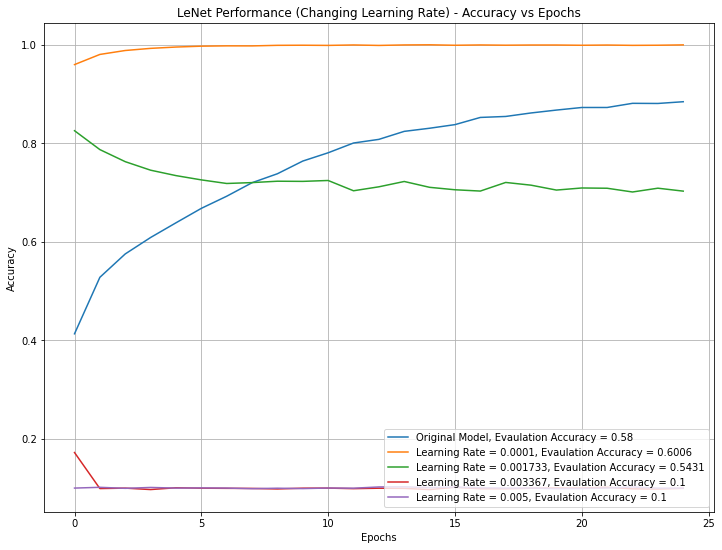

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Learning Rate) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history4):
	if(idx == 0):
		plt.plot(history4[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test4[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Learning Rate) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history4[1].history['accuracy']

for idx, i in enumerate(history4):
	if (idx == 0):
		plt.plot(history4[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test4[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Batch Size
The following code represents the altering of the batch size in relation to the model accuracy. 

In [ ]:
#Compiling the model with a loss, optimizer, and other metrics
batches = [8, 16, 32, 64, 128] 
history4 = []
test4 = []

lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=32))
test4.append(lanet.evaluate(x_test, y_test))

for bat in batches:
    #Shows the whole network topology for the compiled CNN
    lanet.summary()

    #Training the network.
    history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=bat)) 
    test4.append(lanet.evaluate(x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0986
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0972
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0970
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3027 - accuracy: 0.1012
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.1000
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.1002
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0960
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.302

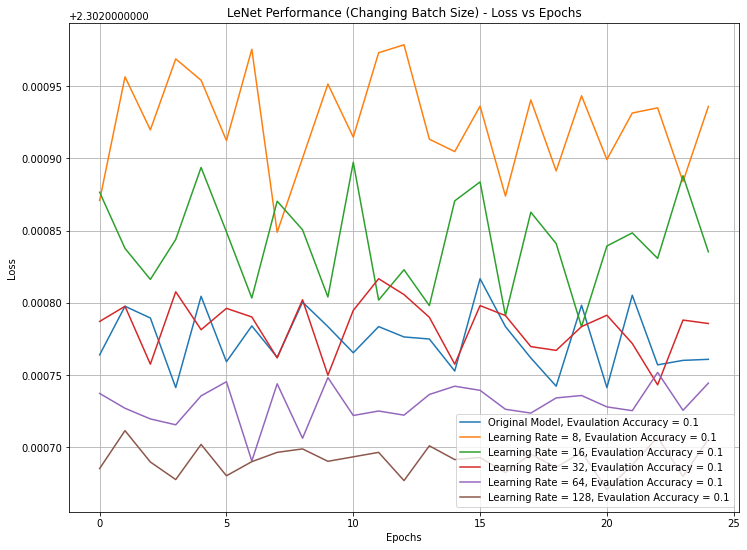

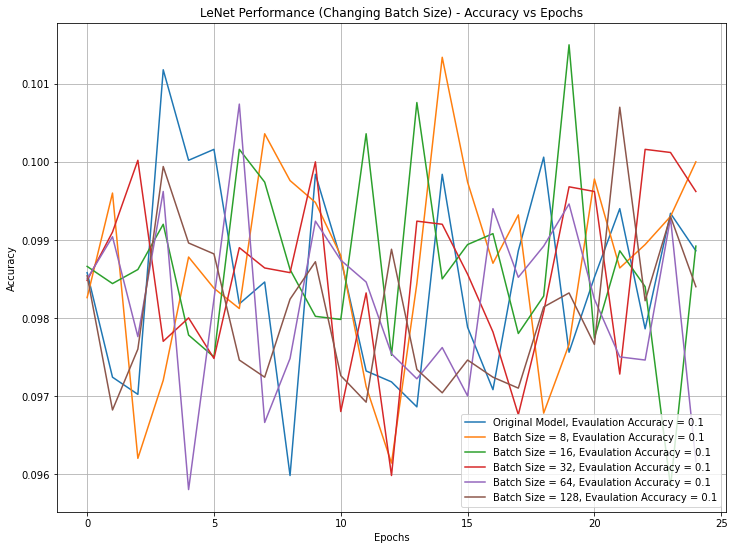

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Batch Size) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history4):
	if(idx == 0):
		plt.plot(history4[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['loss'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test4[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Batch Size) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

for idx, i in enumerate(history4):
	if (idx == 0):
		plt.plot(history4[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test4[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Best Performance
The best performing network was the lowest learning rate of 0.0001 tested with the batch size of 16.
These hyperparameters seemed to produce the greatest accuracy from the test data set. See this code
below. 

In [ ]:
history4 = []
test4 = []

learning = 0.0001
batch = 16

opt = keras.Optimizer.Adam(lr=learning)
lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history4.append(lanet.fit(x_train, y_train, epochs=25, batch_size=batch))
test4.append(lanet.evaluate(x_test, y_test))

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Best Performance) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(history4[idx].history['loss'], label=f'Learning Rate = {learning}, Batch Size = {batch}, Evaulation Accuracy = {test4[1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Best Performance) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.plot(history4[idx].history['accuracy'], label=f'Learning Rate = {learning}, Batch Size = {batch}, Evaulation Accuracy = {test4[1]:.4}')

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Deep Learning Model
The following code represents the LeNet 5 model as a deep learning model.

In [ ]:
# Building the LeNet model in keras
lanet_deep = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [32, 32, 3]),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

#Compiling the model with a loss, optimizer, and other metrics
opt = keras.optimizers.Adam(lr=0.0001)
lanet_deep.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

#Shows the whole network topology for the compiled CNN
lanet_deep.summary()

#Training the network.
history5 = lanet_deep.fit(x_train, y_train, epochs=25, batch_size=32)
test5 = lanet_deep.evaluate(x_test, y_test)

print(f"From the deep learning model, the loss achieved and accuracy achieved are: {test5[0]} and {test5[1]} respectively.")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 6)                 18438     
                                                                 
 dense_19 (Dense)            (None, 16)                112       
                                                                 
 dense_20 (Dense)            (None, 120)               2040      
                                                                 
 dense_21 (Dense)            (None, 84)                10164     
                                                                 
 dense_22 (Dense)            (None, 10)                850       
                                                                 
Total params: 31,604
Trainable params: 31,604
Non-trai

### Problem 2 - Question Responses
The following list are the responses to the questions shown in the assignment document. 

1. As the learning rate increases, the accuracy and loss both stagnated. The Adam optimizer uses the
   default learning rate of 0.0001 value. Utilizing a lower learning rate with the Adam optimizer
   yields better accuracy in the test dataset but not a great one. As shown in the above graphs, the
   0.0001 learning rate yielded a 0.60 accuracy for the test dataset during evaluation. 
2. The batch size allowed for a faster turnaround as it was increased from the default 32 and it
   would increase the step time per epoch as the batch size decreased from 32 to 8 and 16
   respectively.  
3. test
4. The results of the deep learning model are lackluster compared to the CNN counterpart. The
   convolutional layers provided much better performance for feature extraction in comparison to the
   dense layers. The number of parameters within this network, however, are just 31,604 compared to
   the 697,047 parameters found in the LaNet5 architecture shown above. The greater number of
   parameters in the CNN are well worth it due to the excellent performance found using the CNN
   architecture. The accuracy achieved in the CNN network versus the DNN is starkly different in the
   amount of epochs used to train the networks. The accuracy of the CNN is seemingly six times
   better than the DNN. The DNN also plateaued at 10% accuracy in comparison to the 90+% accuracy
   achieved during training over the same amount of epoch steps. 
***

# Problem 3

In [ ]:
X = np.array([[7, 5, 0, 0, 3, 2], [6, 4, 5, 1, 4, 8], [9, 0, 2, 2, 5, 4],  [6, 3, 4, 7, 9, 8], [5, 7, 5, 6, 9, 0], [7, 9, 0, 8, 2, 3]])
f = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

[a, b] = X.shape
y = np.zeros((a-2, b-2))

#Algorithm for manual convolution:
for i in range(1, X.shape[0]-1):
	for j in range(1, X.shape[1]-1):
		x = X[(i-1):(i+2), (j-1):(j+2)]
		s = np.add(f, x)
		y[i-1, j-1] = s.sum()

print('Output of the convolution between the X and f matrices shown above is shown below:')
print(y)

Output of the convolution between the X and f matrices shown above is shown below:
[[38. 19. 22. 29.]
 [39. 28. 39. 48.]
 [41. 36. 49. 50.]
 [46. 49. 50. 52.]]


In [ ]:
# The following is the max pooling operation performed on the above output. 
o = np.zeros((2, 2))

o[0, 0] = np.max(y[0:2, 0:2])
o[1, 0] = np.max(y[2:4, 0:2])
o[0, 1] = np.max(y[0:2, 2:4])
o[1, 1] = np.max(y[2:4, 2:4])

print('Output of the max pooling operation.')
print(o)

Output of the max pooling operation.
[[39. 48.]
 [49. 52.]]


The following are responses to the Problem 3 questions. 
1. The dimensions of the input and kernel are 6x6x1 and 3x3x1 respectively. The number of parameters
   is ((3x3x1)+1)x1 = 10 
2. The output activation map is shown above. The dimensions 4x4x1. 
3. See the output of the max pooling using a stride of (2,2) and a filter size of (2,2) with no
   padding. 